# Import packages

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [41]:
data = pd.read_csv('train.csv')

In [42]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.09
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.65
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.60
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.90


In [43]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Y
5995,FDB32,20.600,Low Fat,0.023586,Fruits and Vegetables,94.7778,OUT017,2007,NaN,Tier 2,Supermarket Type1,7.18
5996,FDJ16,9.195,Low Fat,0.115064,Frozen Foods,58.6246,OUT049,1999,Medium,Tier 1,Supermarket Type1,6.77
5997,FDJ32,10.695,Low Fat,0.057910,Fruits and Vegetables,60.4536,OUT045,2002,NaN,Tier 2,Supermarket Type1,5.21
5998,FDO12,15.750,Low Fat,0.054920,Baking Goods,195.8452,OUT035,2004,Small,Tier 2,Supermarket Type1,8.50
5999,NCB18,19.600,Low Fat,0.041291,Household,86.9514,OUT046,1997,Small,Tier 1,Supermarket Type1,7.26


In [44]:
data.shape

(6000, 12)

# Data Exploration & Cleaning

Count the nulls and identify the type of each feature

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      6000 non-null   object 
 1   X2      4994 non-null   float64
 2   X3      6000 non-null   object 
 3   X4      6000 non-null   float64
 4   X5      6000 non-null   object 
 5   X6      6000 non-null   float64
 6   X7      6000 non-null   object 
 7   X8      6000 non-null   int64  
 8   X9      4289 non-null   object 
 9   X10     6000 non-null   object 
 10  X11     6000 non-null   object 
 11  Y       6000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 562.6+ KB


Descriptive Statistics

In [46]:
data.describe()

,X2,X4,X6,X8,Y
count,4994.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,12.956536,0.066333,141.228200,1997.840333,7.303403
std,4.658851,0.051492,62.540569,8.334412,1.014361
min,4.555000,0.000000,31.290000,1985.000000,3.510000
25%,8.895000,0.027030,94.037650,1987.000000,6.750000
50%,12.800000,0.054620,143.197000,1999.000000,7.500000
75%,17.100000,0.095154,186.522050,2004.000000,8.040000
max,21.350000,0.328391,266.888400,2009.000000,9.400000


Explore the categorical features

In [47]:
# Count the unique values in each categorical feature
print(data['X1'].unique().size)
print(f"X3 = {data['X3'].unique()}, number = {data['X3'].unique().size}")
print(f"X5 = {data['X5'].unique()}, number = {data['X5'].unique().size}")
print(f"X7 = {data['X7'].unique()}, number = {data['X7'].unique().size}")
print(f"X10 = {data['X10'].unique()}, number = {data['X10'].unique().size}")
print(f"X11 = {data['X11'].unique()}, number = {data['X11'].unique().size}")

1553
X3 = ['Low Fat' 'Regular' 'low fat' 'LF' 'reg'], number = 5
X5 = ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'], number = 16
X7 = ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'], number = 10
X10 = ['Tier 1' 'Tier 3' 'Tier 2'], number = 3
X11 = ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'], number = 4


# Data Preprocessing Pipeline
* **Ordinal Feature Encoder**: Convert categorical variables into numerical variables while keeping the order of categories.
* **Label Feature Encoder**: Convert categorical labels into numerical labels.
* **Feature Dropper**: Drops unnecessary features from the dataset.

In [48]:
class OrdinalFeatureEncoder(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        ordinal_encoder = OrdinalEncoder(
            categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                        ['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']])
        X[['X10_encoded', 'X11_encoded']] = ordinal_encoder.fit_transform(X[['X10', 'X11']]) + 1
        return X

In [49]:
class LabelFeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X['X3'] = X['X3'].str.lower().replace({'lf': 'low fat', 'reg': 'regular'})
        X3_label_encoder = LabelEncoder()
        X['X3_encoded'] = X3_label_encoder.fit_transform(X['X3']) 
        X5_label_encoder = LabelEncoder()
        X['X5_encoded'] = X5_label_encoder.fit_transform(X['X5'])
        return X

In [50]:
class FeatureDropper(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.drop(['X1', 'X7', 'X10', 'X11', 'X3', 'X5', 'X2', 'X9'], axis=1, errors="ignore")

In [51]:

pipeline = Pipeline([("OrdinalFeatureEncoder", OrdinalFeatureEncoder()),
                     ("LabelFeatureEncoder", LabelFeatureEncoder()),
                     ("FeatureDropper", FeatureDropper())])

data = pipeline.fit_transform(data)
data.head()

,X4,X6,X8,Y,X10_encoded,X11_encoded,X3_encoded,X5_encoded
0,0.016047,249.8092,1999,8.23,1.0,2.0,0,4
1,0.019278,48.2692,2009,6.09,3.0,3.0,1,14
2,0.016760,141.6180,1999,7.65,1.0,2.0,0,10
3,0.000000,182.0950,1998,6.60,3.0,1.0,1,6
4,0.000000,53.8614,1987,6.90,3.0,2.0,0,9


In [52]:
print(f"X3 = {data['X3_encoded'].unique()}, number = {data['X3_encoded'].unique().size}")

X3 = [0 1], number = 2


Plot the correlations after encoding all the features

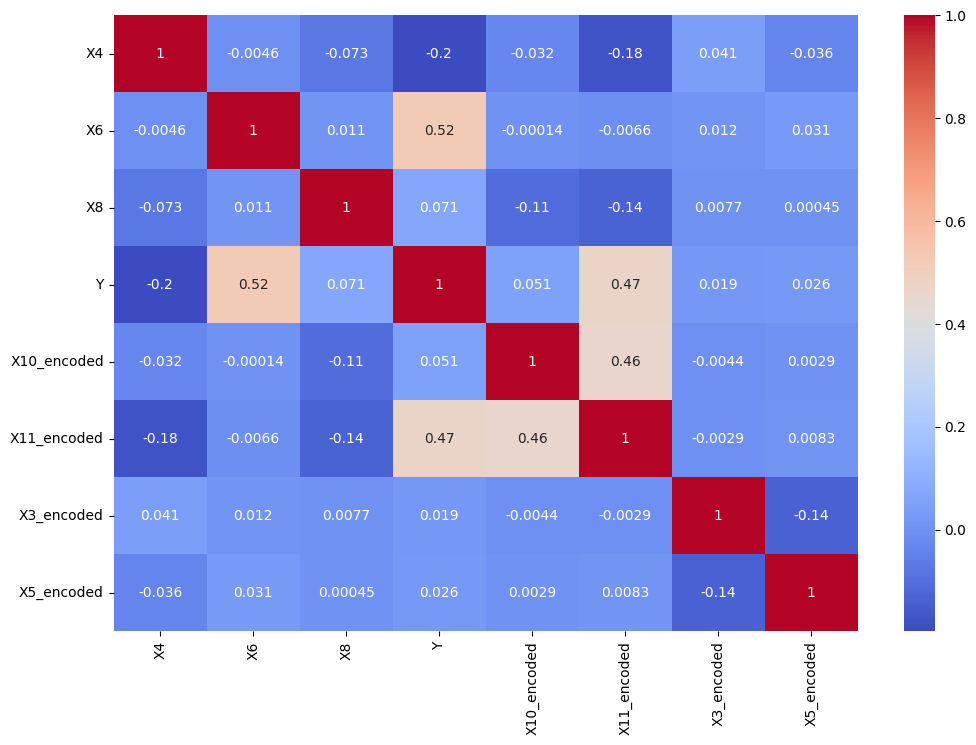

In [53]:
plt.figure(figsize=(12, 8))  # Increase size (width=12, height=8)
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

# Data Splitting

In [54]:
X = data.drop(['Y'], axis=1)
y = data['Y']

# Model Training with RandomForestRegressor

In [55]:
reg = RandomForestRegressor()

param_grid = [
    {"n_estimators": [10, 100, 200, 500],
     "max_depth": [None, 5, 10],
     "min_samples_split": [2,3,4]}
]

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
grid_search.fit(X, y)
best_reg = grid_search.best_estimator_
best_reg

RandomForestRegressor(max_depth=5, min_samples_split=4, n_estimators=200)

# Final Predictions

In [56]:
test_data = pd.read_csv('test.csv')
test_data = pipeline.transform(test_data)
test_data.head()

,X4,X6,X8,X10_encoded,X11_encoded,X3_encoded,X5_encoded
0,0.021273,229.1326,1985,3.0,4.0,0,2
1,0.027588,86.1856,1987,3.0,2.0,1,3
2,0.111782,182.3292,1998,3.0,1.0,0,5
3,0.029606,65.4142,1999,1.0,2.0,1,0
4,0.129141,109.4886,2007,2.0,2.0,0,6


In [57]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2523 entries, 0 to 2522
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   X4           2523 non-null   float64
 1   X6           2523 non-null   float64
 2   X8           2523 non-null   int64  
 3   X10_encoded  2523 non-null   float64
 4   X11_encoded  2523 non-null   float64
 5   X3_encoded   2523 non-null   int32  
 6   X5_encoded   2523 non-null   int32  
dtypes: float64(4), int32(2), int64(1)
memory usage: 118.4 KB


In [58]:
predictions = best_reg.predict(test_data)
predictions

array([8.64000047, 7.05560153, 6.10864338, ..., 7.06074372, 7.29604225,
       7.010457  ])

In [59]:
final_predictions = pd.DataFrame()
final_predictions['row_id'] = [i for i in range(test_data.shape[0])]
final_predictions['Y'] = predictions
final_predictions.to_csv("Predictions.csv", index=False)